# Introduction to Neural Networks

This goal of this lesson is to provide a brief introduction to neural networks, focussing on the MNIST handwritten digit classification problem, and implementing a neural network using Python and Keras.

1. Data structures for neural networks: tensors
2. The MNIST dataset
3. Neural network structure and intuition
4. Tensor operations in neural networks
5. Loss and learning
6. Implementation with Keras

## Image Classification with MNIST: The Goal
The MNIST database is a database of handwritten images of digits between $0$ and $9$. It is one of the foundational datasets in machine learning, and a great point of departure for neural networks.
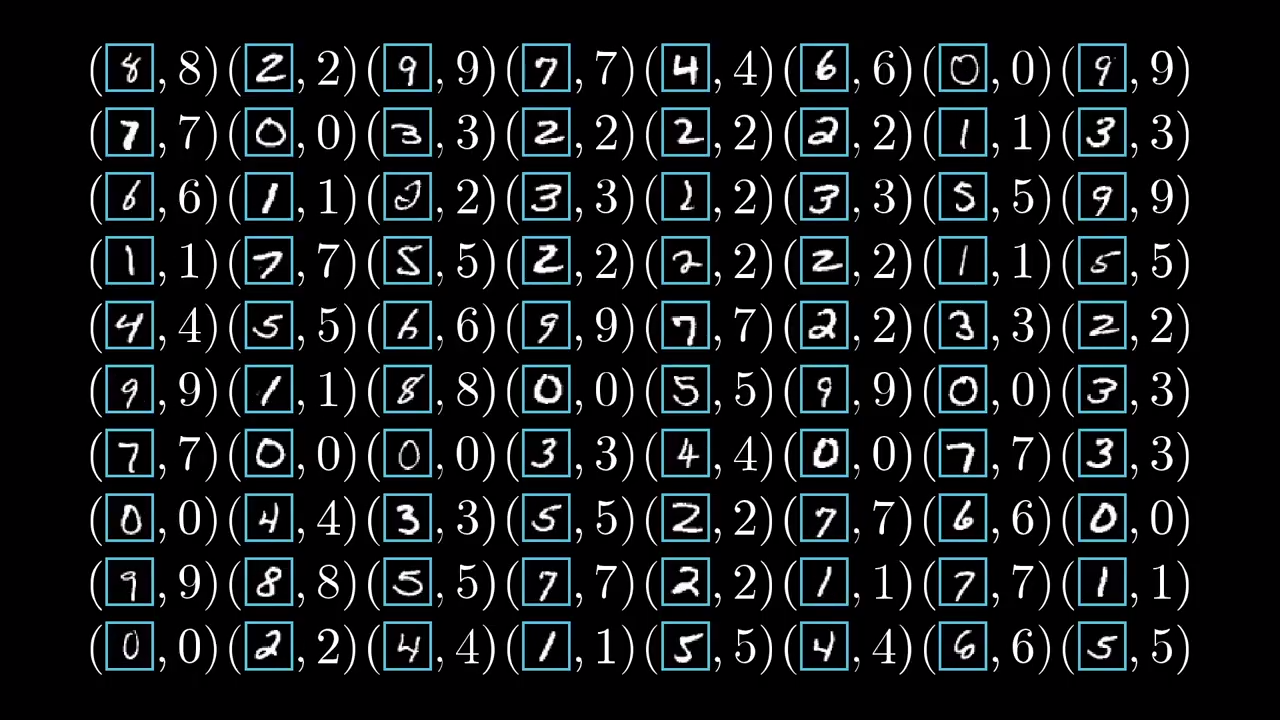
<div style="text-align:center;">**MNIST Image, Class Pairs** ([3Blue1Brown](https://www.youtube.com/watch?v=aircAruvnKkm))</div>


Before we delve into the details of the MNIST dataset, we need to touch on the basics of data containers for neural networks in Python- tensors.

## 1. Data Structures for Neural Networks: Tensors
Neural networks rely on a core set of binary operations on inputs- in fact, all processing in a neural network can be reduced to small number of tensor operations applied to tensors of numeric data.

A tensor can be broadly described as a container for data- almost always numerical data. Tensors form the basic data structure for almost all contemporary machine learning and deep learning models. You're likely already familiar with some forms of tensors in lower dimensions!

### Scalars (0-dimensional tensors)

In [4]:
import numpy as np
x = np.array(42)

In [2]:
x

array(42)

In [3]:
x.ndim

0

The `ndim` method for a Numpy array displays the number of axes of a Numpy tensor

In [4]:
x.shape

()

The `shape` method for a Numpy array displays a tuple with the number of dimensions accross each of the tensor's axes.

### Vectors (1-dimensional tensors)

Vectors have a single axis; a vector with **n** entries is called an n-dimensional vector, which is different to an n-D tensor. An n-D tensor has 5 axes, and may have any number of dimensions along each of its n axes.

In [5]:
x = np.array(range(10))

In [6]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
x.ndim

1

In [8]:
x.shape

(10,)

### Matrices (2-dimensional tensors)

2-dimensional tensors are referred to as matrices; matrices have two axes, commonly referred to as rows and columns.

In [9]:
x = np.array([[1,2,3], [4,5,6], [7,8,9]])

In [10]:
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [11]:
x.ndim

2

In [12]:
x.shape

(3, 3)

### 3D and higher-dimensional tensors

Combining 3D tensors in an array creates 4D tensors, and so on for higher dimensions

In [13]:
x = np.array([x, [[10,11,12], [13,14,15], [16,17,18]]])

In [14]:
x

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]]])

In [15]:
x.ndim

3

In [16]:
x.shape

(2, 3, 3)

## 2. MNIST Data Structure

Now that we're comfortable with the basics of the data structures we'll encounter when working with neural networks, lets take a closer look at the MNIST dataset.

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
print(f'Number of axes: {train_images.ndim}')
print(f'Dimensions along each axis: {train_images.shape}')
print(f'Data type of tensors: {train_images.dtype}')
print(f'(min, max) values: {(np.amin(train_images), np.amax(train_images))}')


Number of axes: 3
Dimensions along each axis: (60000, 28, 28)
Data type of tensors: uint8
(min, max) values: (0, 255)


`train_images` is a 3D tensor of 8-bit integers. It contains the data for 60 000 grayscale images, each of which is represented by a 28$\times$28 matrix (with 784 total entries), where each entry is an integer between 0 and 255. The choice of 255 is quite precise: the grayscale image format allows for 256 different possible shaded of gray for each pixel (remember that Python is 0-indexed).

Digit label: 9


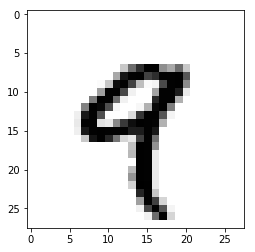

In [44]:
digit = train_images[4]
print(f'Digit label: {train_labels[4]}')

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

If we divide each entry in the grayscale matrices by 255 (their maximum value), we obtain the same matrix, with each entry falling in the range $[0,1]$, with values close to 1 being the most visible, and values close to 0 being the least visible.
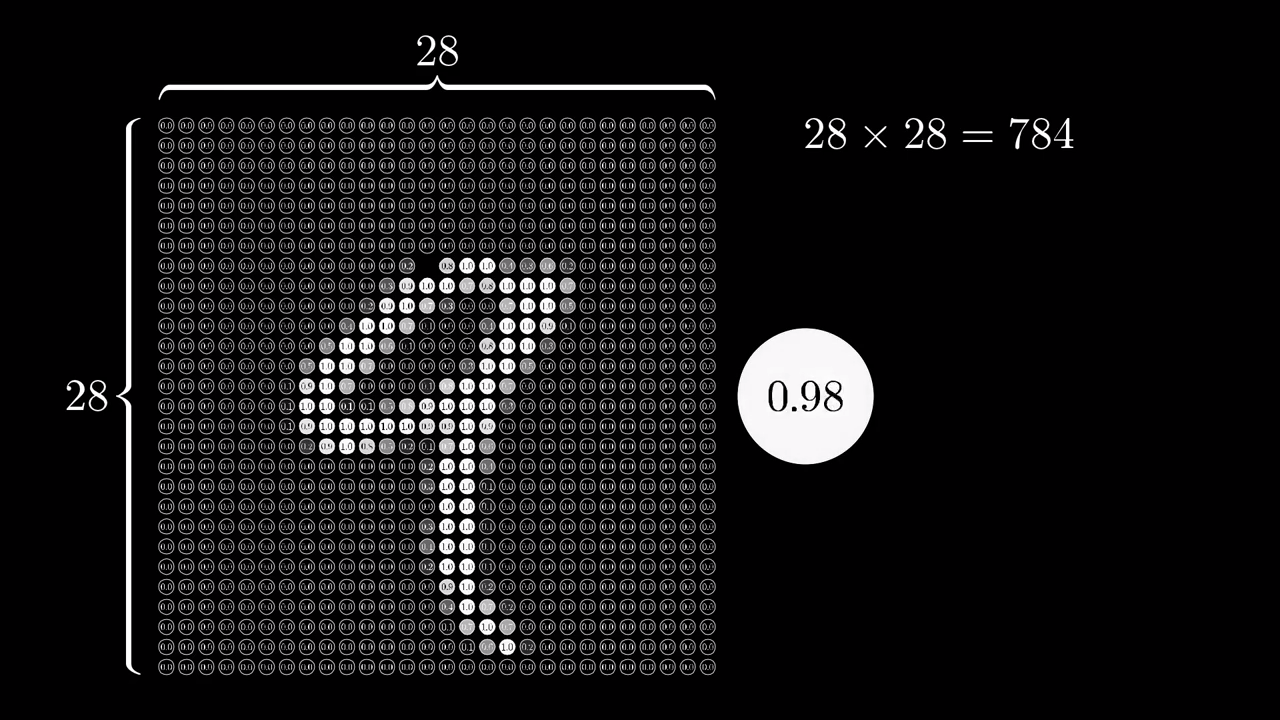
<div style="text-align:center;">**MNIST Image Illustration** ([3Blue1Brown](https://www.youtube.com/watch?v=aircAruvnKkm))</div>

## 3. Neural Network Structure and Intuition

A simple neural network is a **connected structure of layers, each of which consists of a number of neurons**. Each neuron can simply be thought of as a container for some number.

The choice of the number of layers and neurons per layer (together with some other choices), defines the **architecture** of the network. The architecture we'll be working with is quite straightforward:
* The number of neurons in the first layer is fixed according to the structure of the input- in the case of the MNIST data, we flatted the $28\times 28$ 2-D tensor into a vector of $784$ neurons. The number in each of the first layer neurons is simply the pixel value in the corresponding position for a given input image.
* The number of neurons in the last layer of the network is also fixed according to the structure of the data we are working with. In this case we are classifying input images as one of the 10 digits $0,\ldots,9$. The final layer must therefore have 10 neurons. The value held by each of these final layer neurons, intuitively, represents the network's confidence in the classification of the input image- a high value in the last final layer neuron, for instance would indicate a high relative degree of confidence that the input image represents a 9, and so on.
* The layers between the first and last layers are referred to as 'hidden layers', and we are completely free to choose the number of hidden layers, and the number of neurons for each hidden layer. In general, a network with more hidden layers and neurons may have more capacity to learn complex patterns, but also imposes a greater computational burden. The choice of 2 hidden layers with 16 neurons each should perform well for the MNIST problem, which is simple as far as deep learning goes.
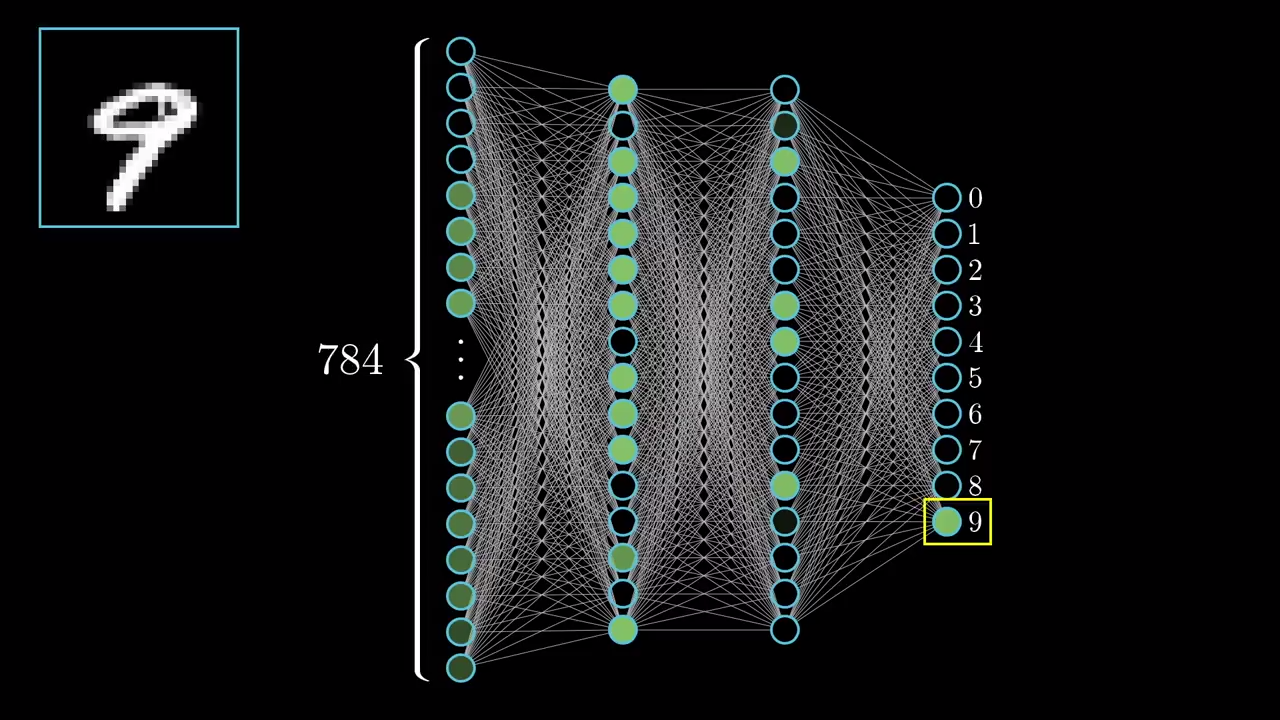
<div style="text-align:center;">** MNIST Neural Network Structure** ([3Blue1Brown](https://www.youtube.com/watch?v=aircAruvnKkm))</div>

The hidden layers are the key to the really sophisticated pattern detection that neural networks are capable of, and the power of each hidden neuron comes from three core operations that neural networks apply:
1. Weighted sums of inputs from the neurons in the previous layers, allowing the hidden layer neurons to be responsive to different degrees to certain patterns in the input.
2. The addition of a bias term (a single positive or negative scalar value) per neuron, which allows each neuron to have a bias towards activity or inactivity, depending on the magnitude of its incoming signal.
3. The application of a non-linear function to each neuron, which enables the network to model a much wider range of problems than is possible with a linear activation function (see the [Universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem)).

These capabilities allow neurons in the network to establish associations with specific patterns in the input data that are associated with each of the classes to which the network must classify the data. Later layer neurons can in general recognize more abstract, high-level features. For instance, hidden layer neurons could learn that the two really crucial patterns to classify a 9 are the upper loop and downward stroke, and we could observe in a highly-trained network that two neurons are highly responsive to precisely these types of patterns in the input, and result in a high probability of an input displaying these patterns being classified as a 9.

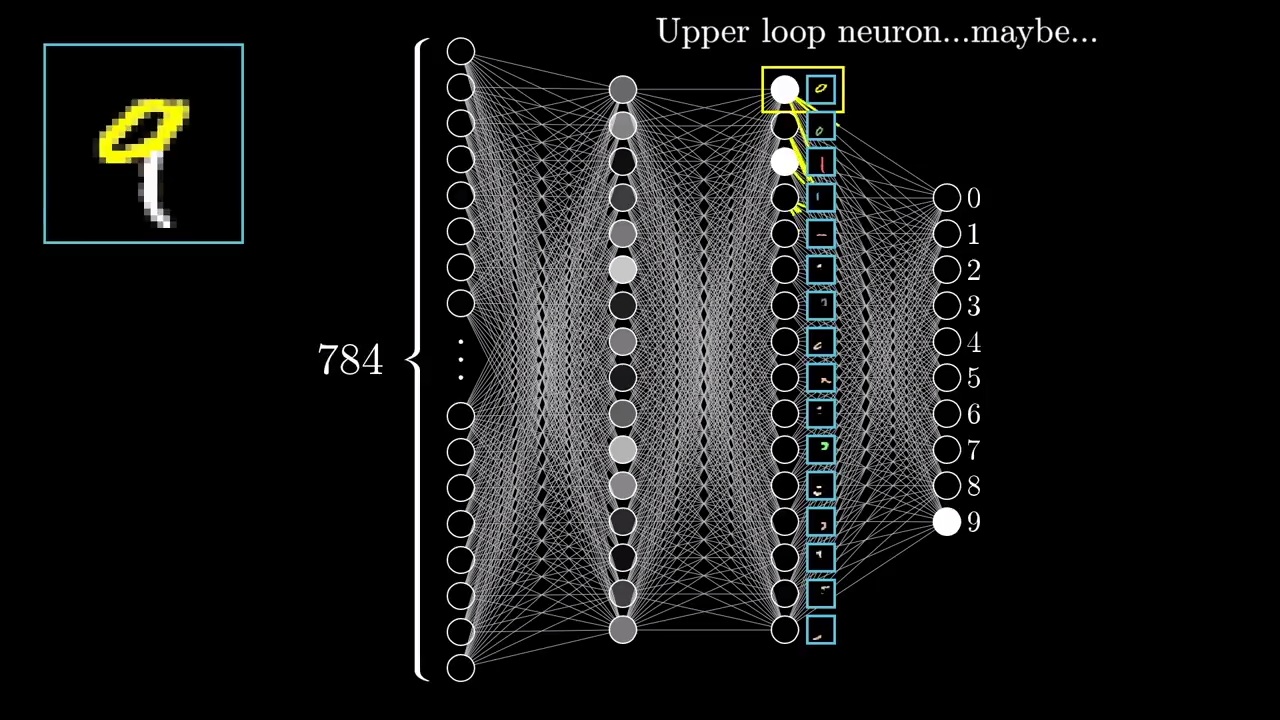
<div style="text-align:center;">**Neuron Pattern Recognition** ([3Blue1Brown](https://www.youtube.com/watch?v=aircAruvnKkm))</div>

Lets dive into the core computation that neural networks perform. Each hidden layer neuron simply represents a number, and that number is obtained as a weighted sum of the previous layer's inputs, together with a single bias term, to which some nonlinear activation function is applied. The sigmoid activation function is a common initial choice, and maps all real numbers to values in $[0,1]$ in a clearly non-linear fashion:
$$ \sigma(x) = \frac{1}{1+\exp(-x)}$$
<div style="display:block;margin:auto;width:400px;text-align:center;">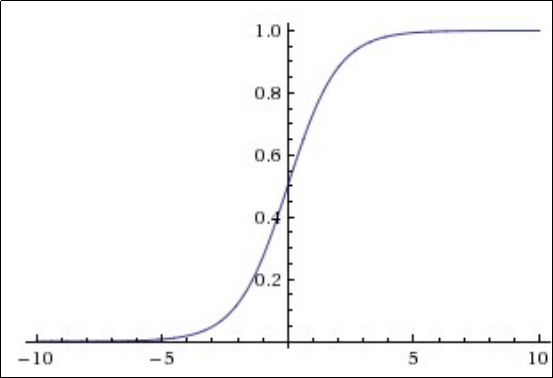**Sigmoid Activation Function**</div>

Consider the first neuron in the first hidden layer of the network: it is connected to each of the neurons in the first layer, and each connection has a different weight associated with it, which allows the neuron to respond differently to specific patterns in the input images.
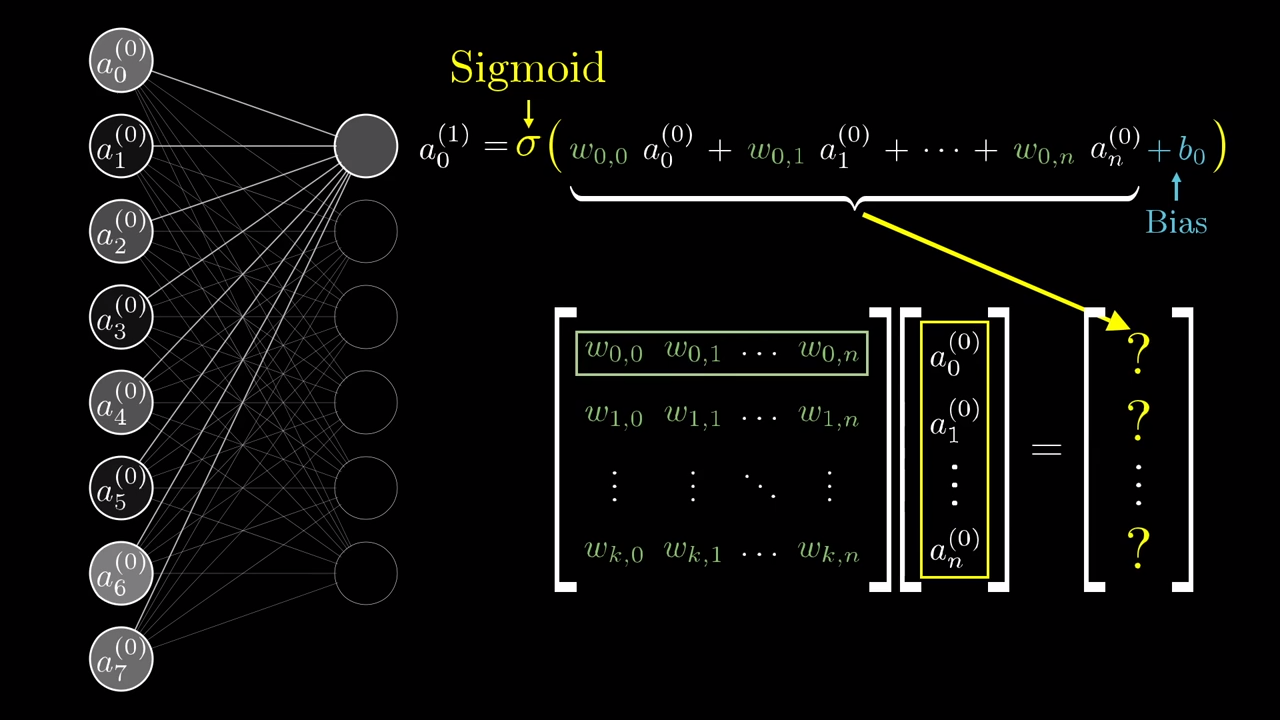
<div style="text-align:center;">**Definition of First Neuron in First Hidden Layer** ([3Blue1Brown](https://www.youtube.com/watch?v=aircAruvnKkm))</div>

This can be neatly represented in terms of matrix notation for the entire first layer of neurons, and the same definition holds for the second hidden layer, using the first hidden layer neurons as inputs, with its own unique set of weights and biases.
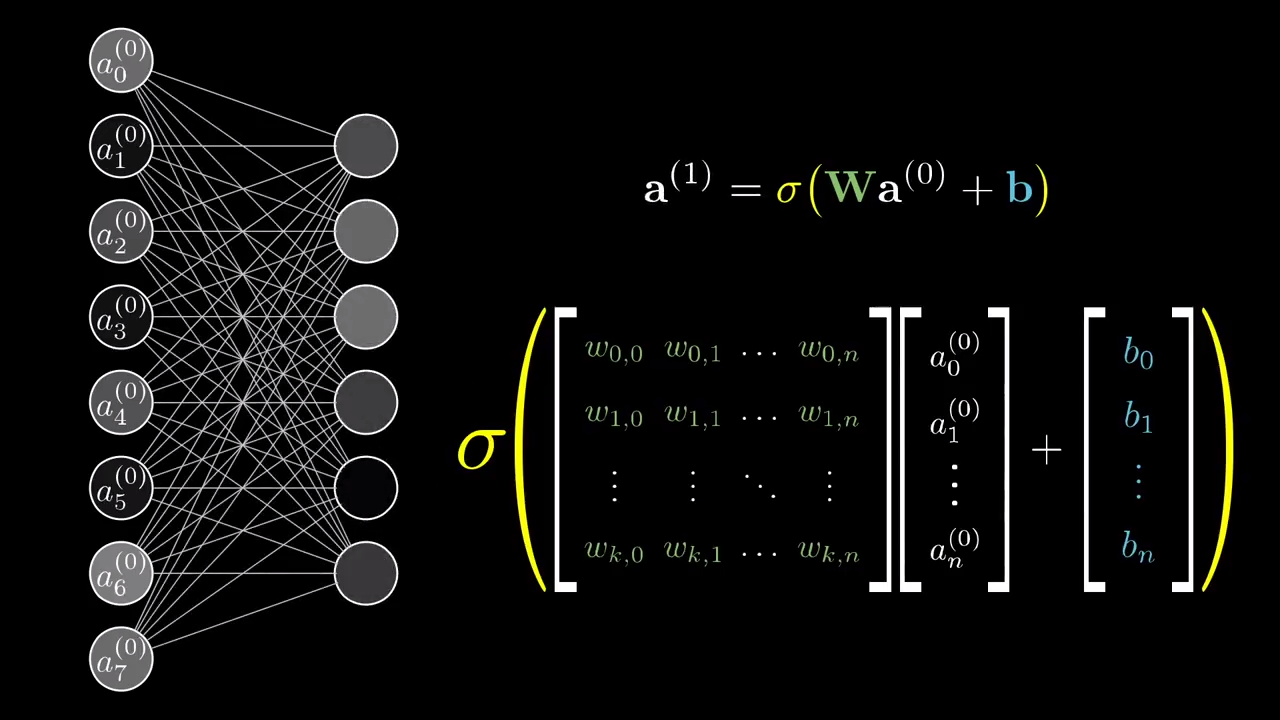
<div style="text-align:center;">**Matrix Notation for First Hidden Layer** ([3Blue1Brown](https://www.youtube.com/watch?v=aircAruvnKkm))</div>

Now that we've defined the structure of our hidden layers recursively and nailed down the core computations we need to perform, a brief diversion into how exactly these computations are implemented...

## 4. Tensor Operations: the building blocks of neural network computations

- Element-wise operations (application of non-linear function, addition of bias terms)
- Tensor dot products (weighted summation of previous layer neurons)

### Element-wise operations

Applied independently to each element being considered.

Tensor addition (e.g. adding bias terms):
```python
def naive_add(x, y):
    """
    Element-wise addition of two 2-D tensors.
    """
     # check that our input is the anticipated size
    assert len(x.shape) == 2
    assert x.shape == y.shape
    # make sure we're not overwriting the input tensor
    x = x.copy()
    # add each element in the same position
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x     
```

Element-wise non-linearities:
```python
import math

def sigmoid(x):
    """
    Simple implementation of the sigmoid function for a single element
    """
    return 1 / (1 + math.exp(-x))

def naive_sigmoid(x):
    """
    Application of sigmoid function to each element of a 2-D tensor
    """
    # check that our input is the anticipated size
    assert len(x.shape) == 2
    # make sure we're not overwriting the input tensor
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = sigmoid(x[i, j])
    return x
```

### Tensor dot products

Multiplying two tensors (e.g. to obtain the values of the neurons in the first hidden layer of the network).
```python
def naive_matrix_vector_dot(x, y):
    """
    Tensor dot product of a matrix and vector
    """
    # check that the first input is a matrix
    assert len(x.shape) == 2
    # check that the second input is a vector
    assert len(y.shape) == 1
    # check that the shapes of the inputs are compatible for multiplication
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z
```
<div style="display:block;margin:auto;width:600px;">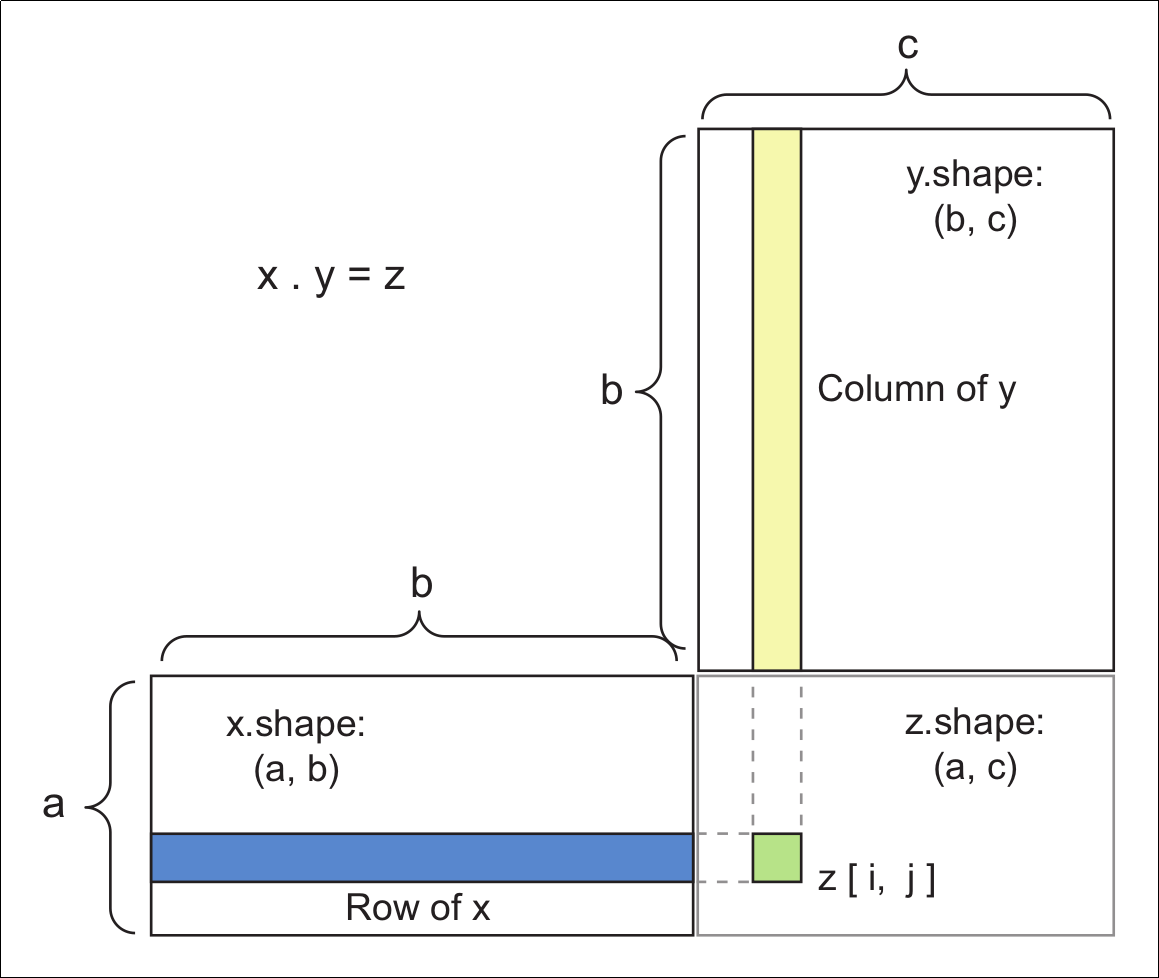</div>
<div style="text-align:center;">**Tensor Multiplication**</div>

**In practice we rely on optimized versions of these tensor operations, built into packages like Numpy.**


"These operations are available as well-optimized built-in Numpy functions, which themselves delegate the heavy lifting to a Basic Linear Algebra Subprograms ( BLAS ) implementation if you have one installed (which you should). BLAS are low-level, highly parallel, efficient tensor-manipulation routines that are typically implemented in Fortran or C."
[Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python)

## A Note on Activation Functions
Activation functions (the non-linear functions applied to each neuron in the network) are one of the real workhorses of neural networks, and the non-linearity that they introduce is essential to enable the neural network to perform the sophisticated feature extraction that they do.

Although sigmoid functions are popular choices of activation functions for introductory examples, they are seldom preferred in modern neural networks due to a key shortcoming: *sigmoids saturate and kill gradients*.
The gradient of the sigmoid function at the 'tails' (when it takes on a value close to either 0 or 1), is almost zero, which makes the learning algorithm (backpropogation) less effective.
<div style="display:block;margin:auto;width:400px;text-align:center;">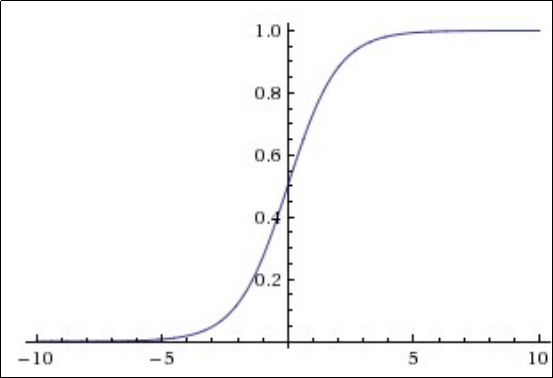**Sigmoid Activation Function**</div>
One of the common modern alternatives is the ReLu function, defined simply as $f(x)=\max(0,x)$, which avoids the gradient saturation problem and has been found to greatly accelerate learning relative to the sigmoid function.
<div style="display:block;margin:auto;width:400px;text-align:center;">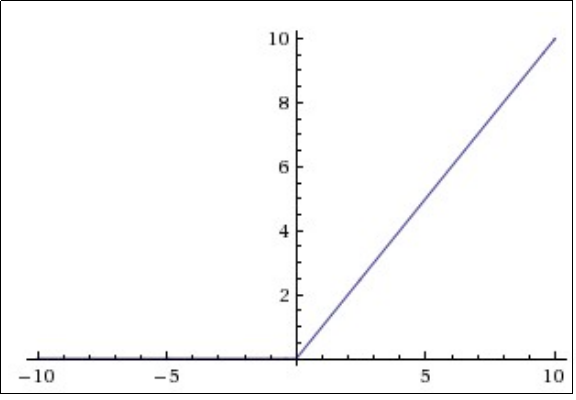**ReLu Activation Function**</div>

## 5. Loss and Learning

Combining together all the component parts of the neural network- the number of neurons, hidden layers (architecture), weights and biases and activation functions, for a given input image, we can predict the class of the image by noting which of the final layer neurons has the largest activation. However, without the correct values of the weights and biases, the network's outputs could essentially be arbitrary! The problem of learning essentially comes down to a principled approach to obtaining weights and biases that enable the network to perform its objective as accurately as possible.

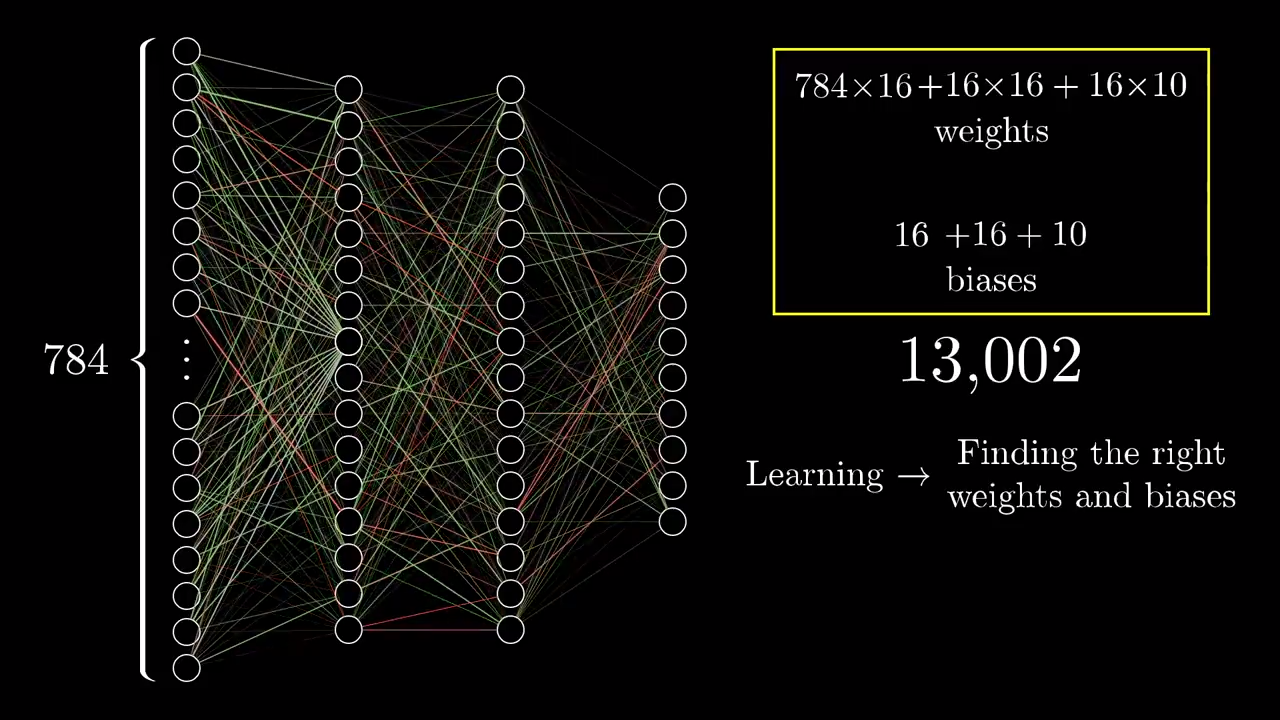
<div style="text-align:center;">**Learning: Choosing Weights and Biases** ([3Blue1Brown](https://www.youtube.com/watch?v=aircAruvnKkm))</div>

Effective approaches to learning need to address two core questions:
1. How the network will know how well it is performing
2. How the network will adjust its weights and biases to perform better.

For this, we need to introduce the **loss function**. 

The job of the loss function is, for a given training example, to tell us how accurate the network's output is. To understand the loss function, we first need to understand introduce the activation function for the final layer neurons, which differs from the sigmoid and ReLu functions we have previously discussed.

<div style="text-align:center;">**Softmax Function**</div>

$$ P(y_i\ |\ x_{i},W,b)=\frac{\exp{(z_{i})}}{\sum_{j=0}^{9}{\exp{(z_{j})}}}$$

$z_j$ is the final network outp|ut (before the application of the final activation function) for the $j$th neuron, where $j=0,1,\ldots,9$. The softmax function gives the normalized probability of the correct class $yi$ given the image $x_i$ and the full set of weights $W$ and biases $b$.

Unfortunately, some statistical jargon is necessary here- the appropriate loss function for this kind of classification problem is called the categorical cross-entropy. This is interpreted quite simply as performing maximum likelihood estimation for the correct class, which corresponds to minimizing its negative log probability.

<div style="text-align:center;">**Categorical cross-entropy**</div>

$$\begin{align} L_i &= -\log(P(y_i\ |\ x_{i},W,b))\\&=-\log\big(\frac{\exp{(z_{i})}}{\sum_{j=0}^{9}{\exp{(z_{j})}}}\big)\\&=-z_i + \log\big(\sum_{j=0}^{9}{\exp{(z_{j})}}\big)\end{align}$$

We don't have to get into the details of the loss function, but the important point to note is that it gives the network the right signal to achieve its objective: **to classify images to their digit classes as accurately as possible**. 

The loss function defines a landscape in many dimensions, and the goal of the network is to find a minimum point on this landscape. We can conceptualize this problem in the analogous 2-D setting, where we could broadly define an algorithm that finds the direction of maximum increase $\nabla C$ for a given point on the loss curve, and takes small steps in the **opposite direction** $-\nabla C$ to move towards a minimum. 

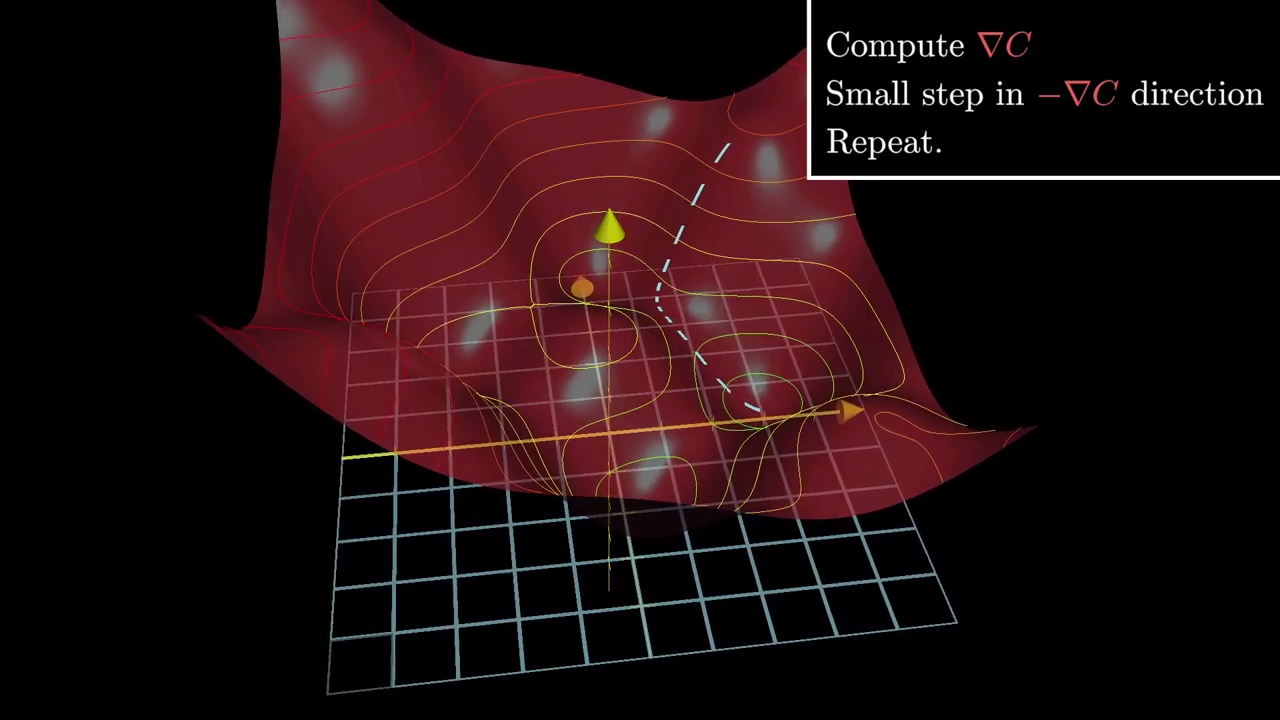
<div style="text-align:center;">**Algorithm to Minimize the Loss Function** ([3Blue1Brown](https://www.youtube.com/watch?v=aircAruvnKkm))</div>

In 2-D we would adjust the $x$ and $y$ coordinates in the direction of the negative gradient. For a neural network, the problem is quite a bit more complicated! We have to consider adjustments to every single weight and bias term in the network. We can conceptualize all of these weights and biases as a vector $\vec{W}$, and the negative gradient $-\nabla C$ as recommending the direction and magnitude of adjustments to each weight and bias in order to move towards a minumum for the loss funnction (and hence achieve maximum accuracy for our classification objective).
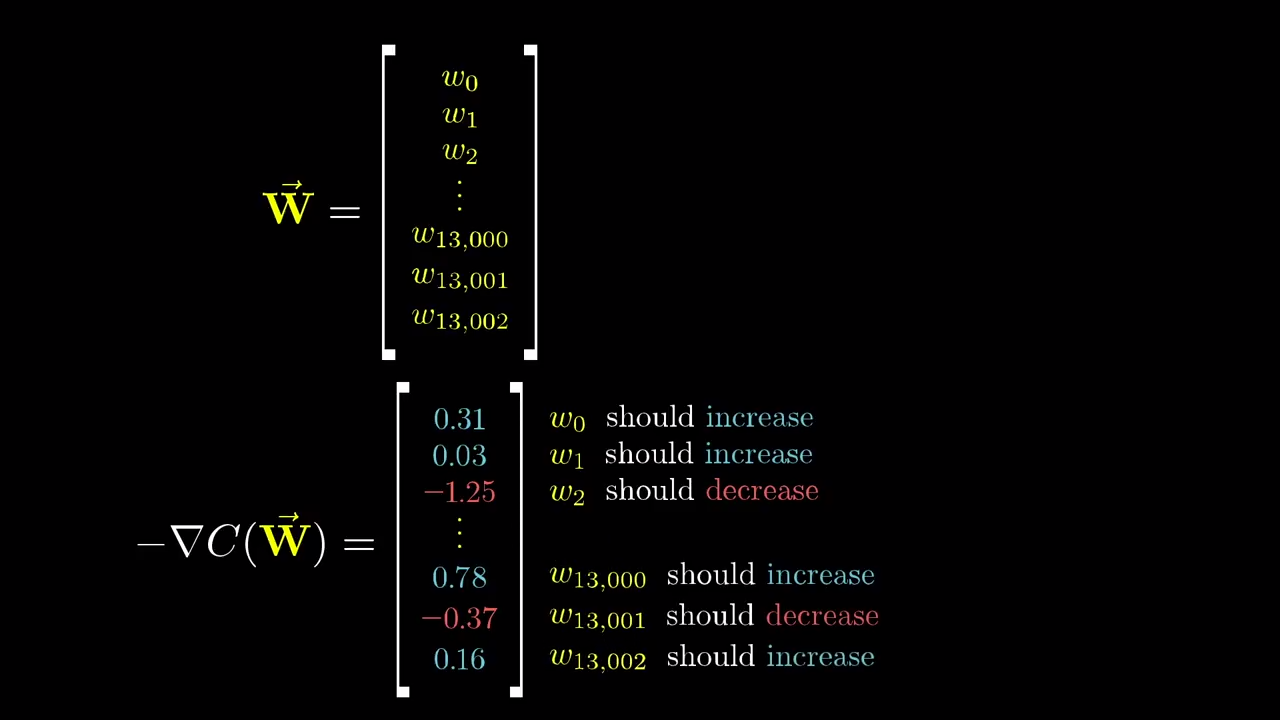
<div style="text-align:center;">**Weight and Bias Adjustments** ([3Blue1Brown](https://www.youtube.com/watch?v=aircAruvnKkm))</div>

We can combine what we've learned about the loss function and gradient into a principled approach to adjusting our parameters. Due to the computational burden, we don't update the parameters with respect to the loss on every single training example, but instead with respect to the loss across a batch of training examples:

<div style="text-align:center;">**Mini-batch Stochastic Gradient Descent**</div>

1. Draw a batch of training samples `x` and corresponding targets `y`.
2. Run the network on $x$ to obtain predictions `y_pred` .
3. Compute the loss of the network on the batch, a measure of the mismatch
between `y_pred` and `y`.
4. Compute the gradient of the loss with regard to the network’s parameters (a backward pass).
5. Asjust the parameters a little in the opposite direction from the gradient—for example `W -= step * gradient` —thus reducing the loss on the by some margin.


This defines a core learning algorithm: Mini-batch Stochastic Gradient Descent. There are many variations (Adagrad, RMSProp, Momentum, etc.) that make corrections to the precise step size and direction in order to increase the effectiveness of learning under different conditions. We won't take this topic further in the present lecture.

We have assumed that we can explicitly calculate the derivative of the loss function with respect to all the network parameters. In practice, however, consists of many tensor operations chained together, each of which has a simple, known derivative. 

$$f(g(x))' = f'(g(x))\times g'(x) $$

The **backpropagation** algorithm uses the chain rule to recursively find the gradients of the loss with respect each of the network parameters- starting from the deeply nested operations at the end of the network, and working back to the beginning of the network. There's a lot of math to this, which we'll visit in another lecture, but for now, we're going to piece together everything we've learned about neural networks into a working example in Keras! 


## 6. Implementation with Keras
Here we put together the pieces to implement a working neural network with Python and Keras.

In [5]:
import keras

# divide images into a training and test set and flatten them
# images become 784-D vectors
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# one-hot encode the digit labels
# e.g. 1 -> [0,1,0,0,0,0,0,0,0,0]
num_classes=10
y_train = keras.utils.to_categorical(train_labels, num_classes)
y_test = keras.utils.to_categorical(test_labels, num_classes)

In [6]:
from keras import models
from keras import layers

# define the network architecture using the Keras functional API
input_tensor = layers.Input(shape=(784,), name='input')
hidden_layer_1 = layers.Dense(units=16, activation='relu', name='hidden_layer_1')(input_tensor)
hidden_layer_2 = layers.Dense(units=16, activation='relu', name='hidden_layer_2')(hidden_layer_1)
output_tensor = layers.Dense(10, activation='softmax', name='output')(hidden_layer_2)

# create the final model object that transforms the input_tensor into the output_tensor
network = models.Model(inputs=input_tensor, outputs=output_tensor)

network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 16)                12560     
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 16)                272       
_________________________________________________________________
output (Dense)               (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras import optimizers

# specify the loss function, gradient descent algorithm, and metrics to monitor training
network.compile(optimizer=optimizers.RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# run the training loop, specifying batch size
# 1 epoch = 1 full pass over all training data
network.fit(x=train_images, y=y_train, batch_size=128, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s - loss: 0.6070 - acc: 0.8285     
Epoch 2/20
60000/60000 [==============================] - 1s - loss: 0.2849 - acc: 0.9179     
Epoch 3/20
60000/60000 [==============================] - 1s - loss: 0.2447 - acc: 0.9287     
Epoch 4/20
60000/60000 [==============================] - 1s - loss: 0.2213 - acc: 0.9365     
Epoch 5/20
60000/60000 [==============================] - 1s - loss: 0.2051 - acc: 0.9411     
Epoch 6/20
60000/60000 [==============================] - 1s - loss: 0.1911 - acc: 0.9444     
Epoch 7/20
60000/60000 [==============================] - 1s - loss: 0.1807 - acc: 0.9476     
Epoch 8/20
60000/60000 [==============================] - 1s - loss: 0.1716 - acc: 0.9503     
Epoch 9/20
60000/60000 [==============================] - 1s - loss: 0.1642 - acc: 0.9521     
Epoch 10/20
60000/60000 [==============================] - 1s - loss: 0.1571 - acc: 0.9536     
Epoch 11/20
60000/60000 [========================

In [9]:
score = network.evaluate(test_images, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.157079121923
Test accuracy: 0.9562


Not bad! In just 20 epochs our network has a classification accuracy of over 95% on unseen data!